## Magnetic Model Comparison

This notebook compares the CHAOS-6-Static crustal field model evaluated by two different implementations:

- [eoxmagmod](https://github.com/ESA-VirES/MagneticModel/tree/staging/eoxmagmod) (used by VirES)
- [chaosmagpy](http://www.spacecenter.dk/files/magnetic-models/CHAOS-6/) (reference Python implementation)

The model uses constant coefficients and so should be the compared results.

In [1]:
from numpy import asarray

def decimal_year_to_mjd2000(decimal_year):
    return (asarray(decimal_year) - 2000) * 365.25

def mjd2000_to_decimal_year(mjd2000):
    return 2000.0 + asarray(mjd2000) / 365.25

### 1) load SHC model file

In [2]:
from os.path import basename
from eoxmagmod.data import CHAOS6_STATIC

print(basename(CHAOS6_STATIC))
print(open(CHAOS6_STATIC).read())

CHAOS-6_static.shc
# CHAOS-6 crustal field model      
# Based on model CHAMP_06i_15      
# extracted on 25-Apr-2016 10:28:29
 21 110   1   1   1
          2005.0021
 21   0    -0.14742
 21   1     0.04817
 21  -1     0.40559
 21   2    -0.10988
 21  -2     0.03854
 21   3     0.16161
 21  -3     0.17316
 21   4    -0.03892
 21  -4     0.08515
 21   5     0.21377
 21  -5    -0.20964
 21   6    -0.10335
 21  -6     0.09326
 21   7     0.00705
 21  -7    -0.13281
 21   8    -0.13899
 21  -8    -0.15910
 21   9     0.06881
 21  -9    -0.13838
 21  10    -0.09396
 21 -10    -0.06358
 21  11     0.07509
 21 -11     0.00967
 21  12    -0.03701
 21 -12    -0.19586
 21  13    -0.06167
 21 -13     0.01951
 21  14     0.05836
 21 -14    -0.05631
 21  15     0.02946
 21 -15    -0.05866
 21  16     0.05069
 21 -16    -0.14656
 21  17    -0.07722
 21 -17    -0.09459
 21  18    -0.07556
 21 -18     0.08403
 21  19     0.01112
 21 -19    -0.00392
 21  20     0.19053
 21 -20    -0.12095
 21  21     0

/usr/local/conda/lib/python3.7/site-packages/spacepy/pycdf/__init__.py:1209: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  class CDF(collections.MutableMapping):


### 2) generate times and locations

In [3]:
# generate random points
from math import pi
from numpy import sin, cos, dstack, linspace
from numpy.random import random, uniform

EARTH_RADIUS = 6371.2 # km
N_coords = 500

X = random((N_coords*2, 2))
X = X[X[..., 1] < sin(X[..., 0]*pi)][:N_coords, ...]
X[..., 0] = pi * (X[..., 0] - 0.5)
X[..., 1] = pi*(2.0*X[..., 1] / cos(X[..., 0]) - 1.0)
X *= 180./pi
lats = X[..., 0]
lons = X[..., 1]
rads = uniform(EARTH_RADIUS, 1.1*EARTH_RADIUS, N_coords)

coords = dstack((lats, lons, rads))[0]

In [4]:
#generate times
from eoxmagmod import load_model_shc
from eoxmagmod.data import CHAOS6_CORE_LATEST
model_vires_core = load_model_shc(CHAOS6_CORE_LATEST)
#N_times = 500
#start, end = model_vires.validity
#times = linspace(start + 1, end - 1, num=N_times)
times = decimal_year_to_mjd2000(model_vires_core.coefficients._times)
N_times = len(times)

### 3) evaluate the VirES model

In [5]:
from numpy import empty
from eoxmagmod import load_model_shc
model_vires = load_model_shc(CHAOS6_STATIC)

b_nec_vires = empty((N_times, N_coords, 3))

for idx, time in enumerate(times):
    b_nec_vires[idx, ...] = model_vires.eval(time, coords, scale=[1, 1, -1], max_degree=85)

### 4) evaluate the reference model

In [6]:
from chaosmagpy import load_CHAOS_shcfile
model_ref = load_CHAOS_shcfile(CHAOS6_STATIC)

b_nec_ref = empty((N_times, N_coords, 3))

for idx, time in enumerate(times):
    a, b, c = model_ref(time, rads, 90.0 - lats, lons, source_list=['static'])
    b_nec_ref[idx, :, 0] = -b
    b_nec_ref[idx, :, 1] = c
    b_nec_ref[idx, :, 2] = -a

Type in version [6.x7]: 
Computing static internal (i.e. small-scale crustal) field up to degree 85.
Finished in 0.203921 seconds.
Computing static internal (i.e. small-scale crustal) field up to degree 85.
Finished in 0.199397 seconds.
Computing static internal (i.e. small-scale crustal) field up to degree 85.
Finished in 0.191076 seconds.
Computing static internal (i.e. small-scale crustal) field up to degree 85.
Finished in 0.190376 seconds.
Computing static internal (i.e. small-scale crustal) field up to degree 85.
Finished in 0.189931 seconds.
Computing static internal (i.e. small-scale crustal) field up to degree 85.
Finished in 0.191739 seconds.
Computing static internal (i.e. small-scale crustal) field up to degree 85.
Finished in 0.192114 seconds.
Computing static internal (i.e. small-scale crustal) field up to degree 85.
Finished in 0.192214 seconds.
Computing static internal (i.e. small-scale crustal) field up to degree 85.
Finished in 0.191808 seconds.
Computing static inte

Finished in 0.190638 seconds.
Computing static internal (i.e. small-scale crustal) field up to degree 85.
Finished in 0.19097 seconds.
Computing static internal (i.e. small-scale crustal) field up to degree 85.
Finished in 0.193099 seconds.
Computing static internal (i.e. small-scale crustal) field up to degree 85.
Finished in 0.190762 seconds.
Computing static internal (i.e. small-scale crustal) field up to degree 85.
Finished in 0.194043 seconds.
Computing static internal (i.e. small-scale crustal) field up to degree 85.
Finished in 0.196767 seconds.
Computing static internal (i.e. small-scale crustal) field up to degree 85.
Finished in 0.191512 seconds.
Computing static internal (i.e. small-scale crustal) field up to degree 85.
Finished in 0.191192 seconds.
Computing static internal (i.e. small-scale crustal) field up to degree 85.
Finished in 0.194803 seconds.
Computing static internal (i.e. small-scale crustal) field up to degree 85.
Finished in 0.191765 seconds.
Computing static 

Finished in 0.190656 seconds.
Computing static internal (i.e. small-scale crustal) field up to degree 85.
Finished in 0.190226 seconds.
Computing static internal (i.e. small-scale crustal) field up to degree 85.
Finished in 0.191877 seconds.
Computing static internal (i.e. small-scale crustal) field up to degree 85.
Finished in 0.191684 seconds.
Computing static internal (i.e. small-scale crustal) field up to degree 85.
Finished in 0.192513 seconds.
Computing static internal (i.e. small-scale crustal) field up to degree 85.
Finished in 0.193933 seconds.
Computing static internal (i.e. small-scale crustal) field up to degree 85.
Finished in 0.192199 seconds.
Computing static internal (i.e. small-scale crustal) field up to degree 85.
Finished in 0.189978 seconds.
Computing static internal (i.e. small-scale crustal) field up to degree 85.
Finished in 0.193427 seconds.
Computing static internal (i.e. small-scale crustal) field up to degree 85.
Finished in 0.189329 seconds.
Computing static

### 5) model comparison

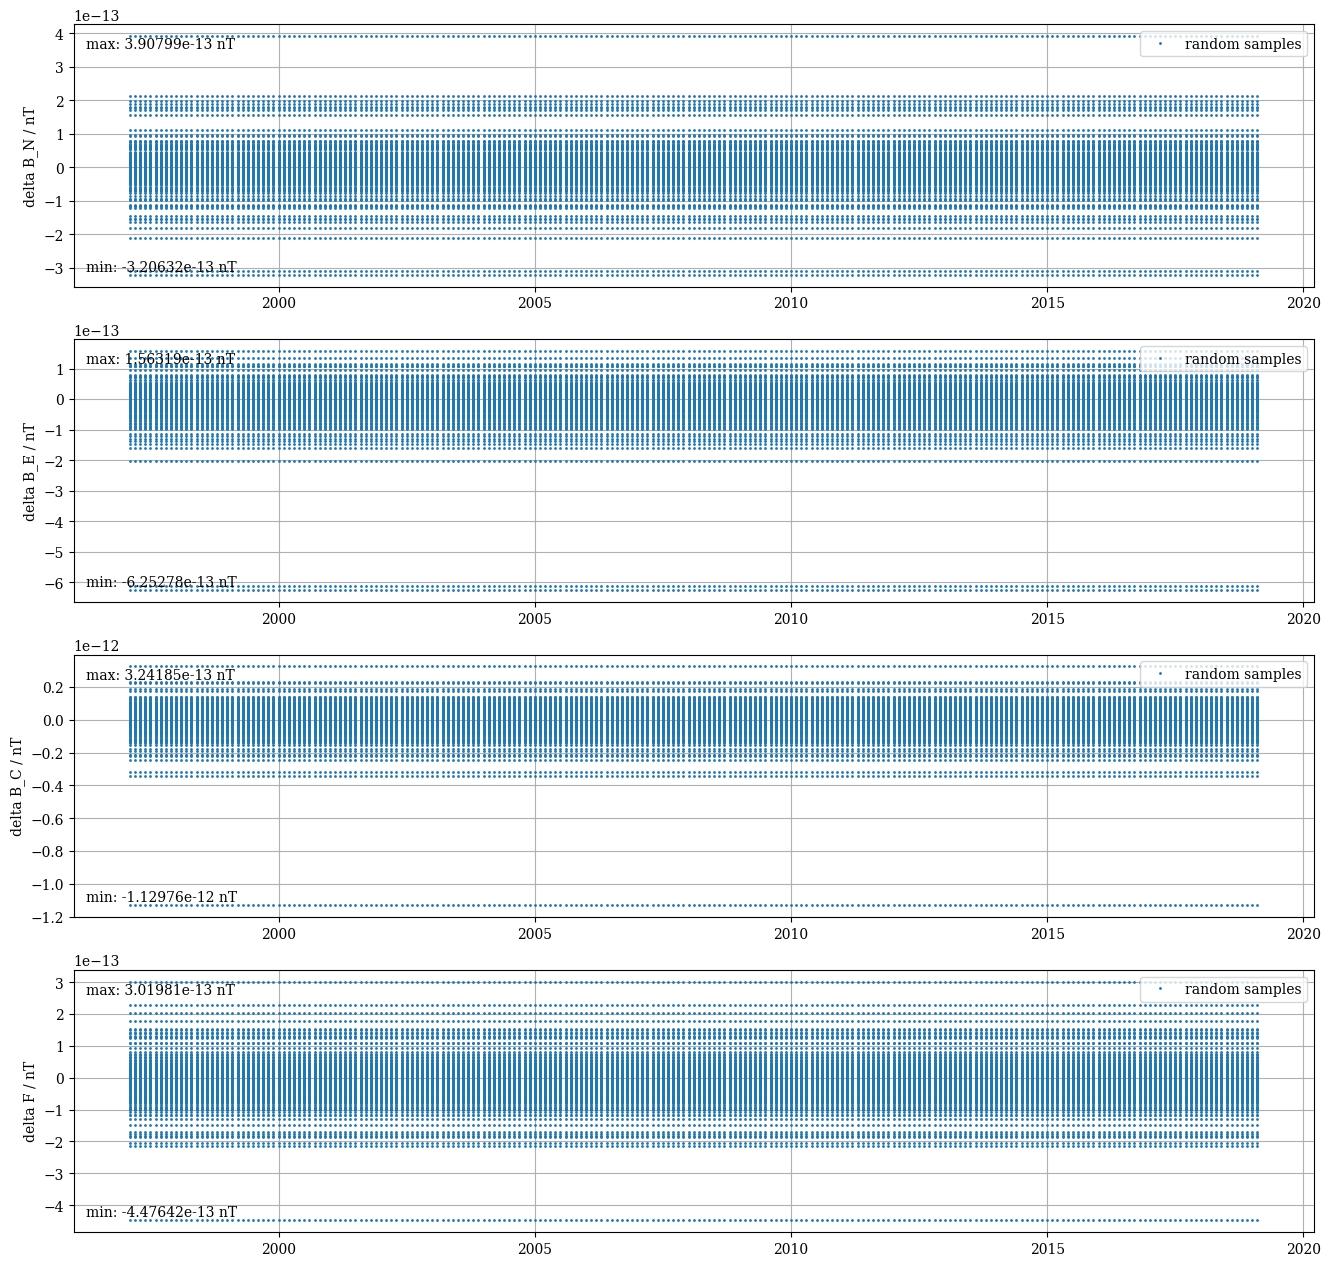

In [7]:
from numpy import zeros, concatenate, isnan
from matplotlib import pyplot as plt
from eoxmagmod import vnorm

delta_b_nec = b_nec_vires - b_nec_ref
delta_f = vnorm(b_nec_vires) - vnorm(b_nec_ref)

fig = plt.figure(figsize=(16, 16), dpi=100)
plt.title("eoxmagmod vs chaosmagpy (CHAOS-6-Static)")

times_dy = mjd2000_to_decimal_year(times)

def plot(ax, x0, y0, label):
    x, y = [], []
    for idx in range(0, N_coords):
        x.append(x0)
        y.append(y0[:, idx])
    x, y = concatenate(x), concatenate(y)
    plt.plot(x, y, '.', markersize=2, color='#1f77b4', label='random samples')
    #plt.plot(node_times, node_val, '+r', markersize=2, label='interpolation nodes')
    plt.ylabel(label)
    plt.legend(loc='upper right')
    plt.text(
        0.01, 0.95, 'max: %g nT' % y[~isnan(y)].max(),
        horizontalalignment='left', verticalalignment='top', transform=ax.transAxes
    )
    plt.text(
        0.01, 0.05, 'min: %g nT' % y[~isnan(y)].min(),
        horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes
    )
    plt.grid()
    
ax = plt.subplot(4, 1, 1)
plot(ax, times_dy, delta_b_nec[..., 0], "delta B_N / nT")

ax = plt.subplot(4, 1, 2)
plot(ax, times_dy, delta_b_nec[..., 1], "delta B_E / nT")

ax = plt.subplot(4, 1, 3)
plot(ax, times_dy, delta_b_nec[..., 2], "delta B_C / nT")

ax = plt.subplot(4, 1, 4)
plot(ax, times_dy, delta_f, "delta F / nT")

plt.show()
%matplotlib inline

### 6) plot locations

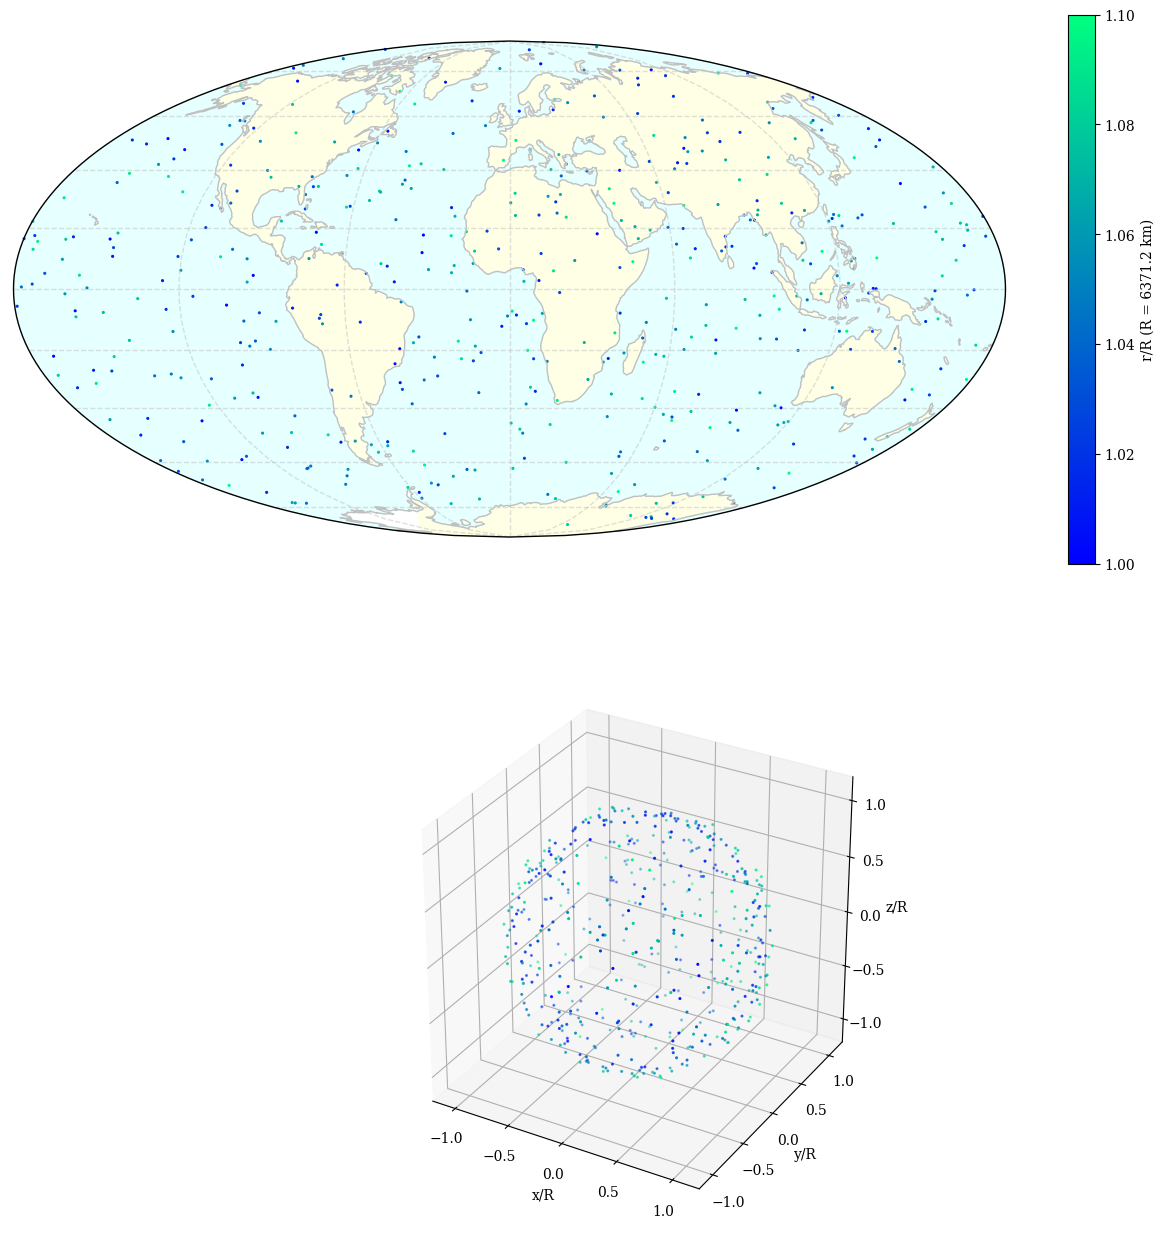

In [8]:
from cartopy.feature import LAND, OCEAN, COASTLINE
from cartopy.crs import Mollweide, PlateCarree
from matplotlib import pyplot as plt
from matplotlib.cm import winter as colormap
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase
from mpl_toolkits.mplot3d import Axes3D
from eoxmagmod import convert, GEOCENTRIC_SPHERICAL, GEOCENTRIC_CARTESIAN
%matplotlib inline

norm = Normalize(vmin=1,vmax=1.1)

#help(ccrs)
fig = plt.figure(figsize=(16, 16), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot(2, 1, 1, projection=Mollweide())
gl = ax.gridlines(crs=PlateCarree(), draw_labels=False, linewidth=1, color='silver', alpha=0.5, linestyle='--')
ax.add_feature(LAND, facecolor=(1.0, 1.0, 0.9))
ax.add_feature(OCEAN, facecolor=(0.9, 1.0, 1.0))
ax.add_feature(COASTLINE, edgecolor='silver')


obj = ax.scatter(
    lons, lats, c=rads/EARTH_RADIUS, s=1.5,
    cmap=colormap, norm=norm, transform=PlateCarree(),
     
)
cb = plt.colorbar(obj)
cb.ax.set_ylabel("r/R (R = %g km)" % EARTH_RADIUS)


ax = plt.subplot(2, 1, 2, projection='3d')

cart_coords = convert(coords, GEOCENTRIC_SPHERICAL, GEOCENTRIC_CARTESIAN)/EARTH_RADIUS
obj = ax.scatter(
    cart_coords[:, 0], cart_coords[:, 1], cart_coords[:, 2], 
    c=rads/EARTH_RADIUS, s=1.5,
    cmap=colormap, norm=norm,
)

ax.set_aspect('equal','box')
ax.set_xlabel("x/R")
ax.set_ylabel("y/R")
ax.set_zlabel("z/R")

plt.show()